# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

### Общая информация
Дата выдачи: 05.10.2020

Мягкий дедлайн: 06:59MSK 19.10.2020 (за каждый день просрочки снимается 1 балл)

Жесткий дедлайн: 06:59MSK 22.10.2020

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 балла бонус.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-gd-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: 10+копеечка за подход к решению бонуса :)

Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — стохастический, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и разобраться как подбирать гиперпараметры для этих методов.

## Задание 1. Реализация градиентного спуска (3.5 балла)

In [13]:
import numpy as np


В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле  `utils.py`:

**Задание 1.1. (0.5 балла)** Полный градиентный спуск **GradientDescent**:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

**Задание 1.2. (1 балл)** Стохастический градиентный спуск **StochasticDescent**:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} q_{i_{k}}(w_{k}).
$$ 

$\nabla_{w} q_{i_{k}}(w_{k}) \,$ - это оценка градиента по батчу объектов, выбранных случайно.

**Задание 1.3. (1 балл)** Метод Momentum **MomentumDescent**:

$$
    h_0 = 0, \\
    h_{k + 1} = \alpha h_{k} + \eta_k \nabla_{w} Q(w_{k}), \\
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

**Задание 1.4. (1 балл)** Метод Adaptive gradient algorithm **Adagrad**:

$$
    G_0 = 0, \\
    G_{k + 1} = G_{k} + \left(\nabla_{w} Q(w_{k})\right) ^ 2, \\
    w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\varepsilon + G_{k + 1}}} \nabla_{w} Q(w_{k}).
$$


Во всех вышеназванных методах мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$
На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

Мы будем использовать функцию потерь MSE:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2
$$

Все вычисления должны быть векторизованы.

## Задание 2. Реализация линейной регресии (1.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `utils.py` - **LinearRegression**.

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы.
* Циклы средствами python допускаются только для итераций градиентного спуска.
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`.
    * Достижение максимального числа итераций `max_iter`.
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту).
* Инициализировать веса нужно нулевым вектором или из нормального $\mathcal{N}(0, 1)$ распределения (тогда нужно зафиксировать seed).

## Задание 3. Проверка кода (0 баллов)

In [14]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
%autoreload 2

import numpy as np

from utils import (
    Adagrad,
    GradientDescent,
    MomentumDescent,
    StochasticDescent,
)
from utils import LinearRegression

In [16]:
num_objects = 100
dimension = 5

X = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

lambda_ = 1e-2
w0 = np.zeros(dimension)

max_iter = 10
tolerance = 0

In [17]:
# GradientDescent

descent = GradientDescent(lambda_ = lambda_, w0 = w0)

gradient = descent.calc_gradient(X, y)

assert gradient.shape[0] == dimension, 'Gradient failed'

diff = descent.step(X, y, 0)

assert diff.shape[0] == dimension, 'Weights failed'

In [ ]:
# StochasticDescent

descent = StochasticDescent(lambda_ = lambda_, w0 = w0)

gradient = descent.calc_gradient(X, y)

assert gradient.shape[0] == dimension, 'Gradient failed'

diff = descent.step(X, y, 0)

assert diff.shape[0] == dimension, 'Weights failed'

In [19]:
# MomentumDescent

descent = MomentumDescent(lambda_ = lambda_, w0 = w0)

gradient = descent.calc_gradient(X, y)

assert gradient.shape[0] == dimension, 'Gradient failed'

diff = descent.step(X, y, 0)

assert diff.shape[0] == dimension, 'Weights failed'

In [20]:
# Adagrad

descent = Adagrad(lambda_ = lambda_, w0 = w0)

gradient = descent.calc_gradient(X, y)

assert gradient.shape[0] == dimension, 'Gradient failed'

diff = descent.step(X, y, 0)

assert diff.shape[0] == dimension, 'Weights failed'

In [ ]:
# LinearRegression

regression = LinearRegression(
    descent = StochasticDescent(lambda_ = lambda_, w0 = w0, batch_size = 2),
    tolerance = tolerance,
    max_iter = max_iter
)

regression.fit(X, y)

assert len(regression.loss_history) == max_iter, 'Loss history failed'

prediction = regression.predict(X)

assert prediction.shape[0] == num_objects, 'Predict failed'

Если ваше решение прошло все тесты локально, то теперь осталось протестировать его в Яндекс Контесте - **https://contest.yandex.ru/contest/19551**.

Никнейм 	
Arseny Neustroev

Для каждой задачи из контеста вставьте ссылку на успешную посылку:

* **GradientDescent**: https://contest.yandex.ru/contest/19551/run-report/39028972/ 
* **StochasticDescent**: https://contest.yandex.ru/contest/19551/run-report/39029111/
* **MomentumDescent**: https://contest.yandex.ru/contest/19551/run-report/39032212/
* **Adagrad**: https://contest.yandex.ru/contest/19551/run-report/39047028/
* **LinearRegression**: https://contest.yandex.ru/contest/19551/run-report/39046672/

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.
Для дальнейшей работы сделайте следующее:
* Проведите разумную предобработку данных.
* Замените целевую переменную на её логарифм.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 3:1:1.

In [22]:
# YOUR CODE:
import pandas as pd

data = pd.read_csv('autos.csv')
data.sample(5)

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,yearOfRegistration,monthOfRegistration,dateCreated,lastSeen,postalCode,price
128947,fiat,500,kleinwagen,manuell,benzin,nein,100,100000,2008,8,2016-03-07 00:00:00,2016-04-05 16:45:16,71540,6200
70555,volkswagen,golf,limousine,manuell,diesel,ja,140,150000,2006,10,2016-03-08 00:00:00,2016-03-09 09:15:47,42853,5900
145759,skoda,roomster,bus,manuell,diesel,nein,80,150000,2010,5,2016-04-02 00:00:00,2016-04-06 11:44:54,38170,4390
133679,bmw,3er,kombi,manuell,benzin,ja,102,150000,1999,7,2016-04-01 00:00:00,2016-04-05 12:46:13,48599,595
48226,opel,corsa,kleinwagen,manuell,benzin,nein,60,150000,2001,5,2016-03-11 00:00:00,2016-03-11 10:38:40,46236,1200


Для начала переведем во флаги бинарные признаки:

In [23]:
data['notRepairedDamage'] = np.where(data['notRepairedDamage'] == 'ja', 1, 0)
np.unique(data["notRepairedDamage"].values)

array([0, 1])

In [24]:
data['is_auto_gearbox'] = np.where(data['gearbox'] == 'automatik', 1, 0)
np.unique(data['is_auto_gearbox'].values)

array([0, 1])

In [25]:
data['is_diesel'] = np.where(data['fuelType'] == 'diesel', 1, 0)
np.unique(data['is_diesel'].values)

array([0, 1])

In [26]:
data = data.drop(['fuelType', 'gearbox', 'notRepairedDamage'], axis = 1)
data.columns

Index(['brand', 'model', 'vehicleType', 'powerPS', 'kilometer',
       'yearOfRegistration', 'monthOfRegistration', 'dateCreated', 'lastSeen',
       'postalCode', 'price', 'is_auto_gearbox', 'is_diesel'],
      dtype='object')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'Количество машин'),
 Text(0.5, 0, 'Цена машины'),
 Text(0.5, 1.0, 'Распределение цены машин')]

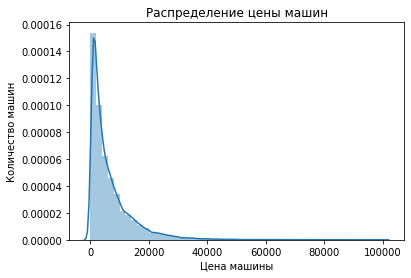

In [29]:
import seaborn as sns
gr = sns.distplot(data['price'])
gr.set(xlabel='Цена машины', ylabel='Количество машин', title="Распределение цены машин")

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'Количество машин'),
 Text(0.5, 0, 'Логариф цены машины'),
 Text(0.5, 1.0, 'Распределение логарифма цены машин')]

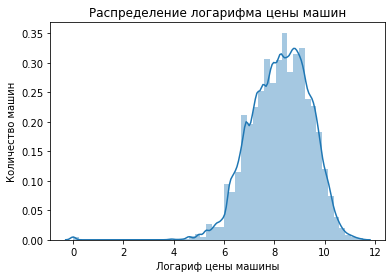

In [30]:
data['price_log'] = np.log(data['price'])
gr = sns.distplot(data['price_log'])
gr.set(xlabel='Логариф цены машины', ylabel='Количество машин', title="Распределение логарифма цены машин")

In [31]:
data = data.drop('price', axis=1)
data.columns

Index(['brand', 'model', 'vehicleType', 'powerPS', 'kilometer',
       'yearOfRegistration', 'monthOfRegistration', 'dateCreated', 'lastSeen',
       'postalCode', 'is_auto_gearbox', 'is_diesel', 'price_log'],
      dtype='object')

Проанализируем дату публикации объявлений, округлив её до даты:

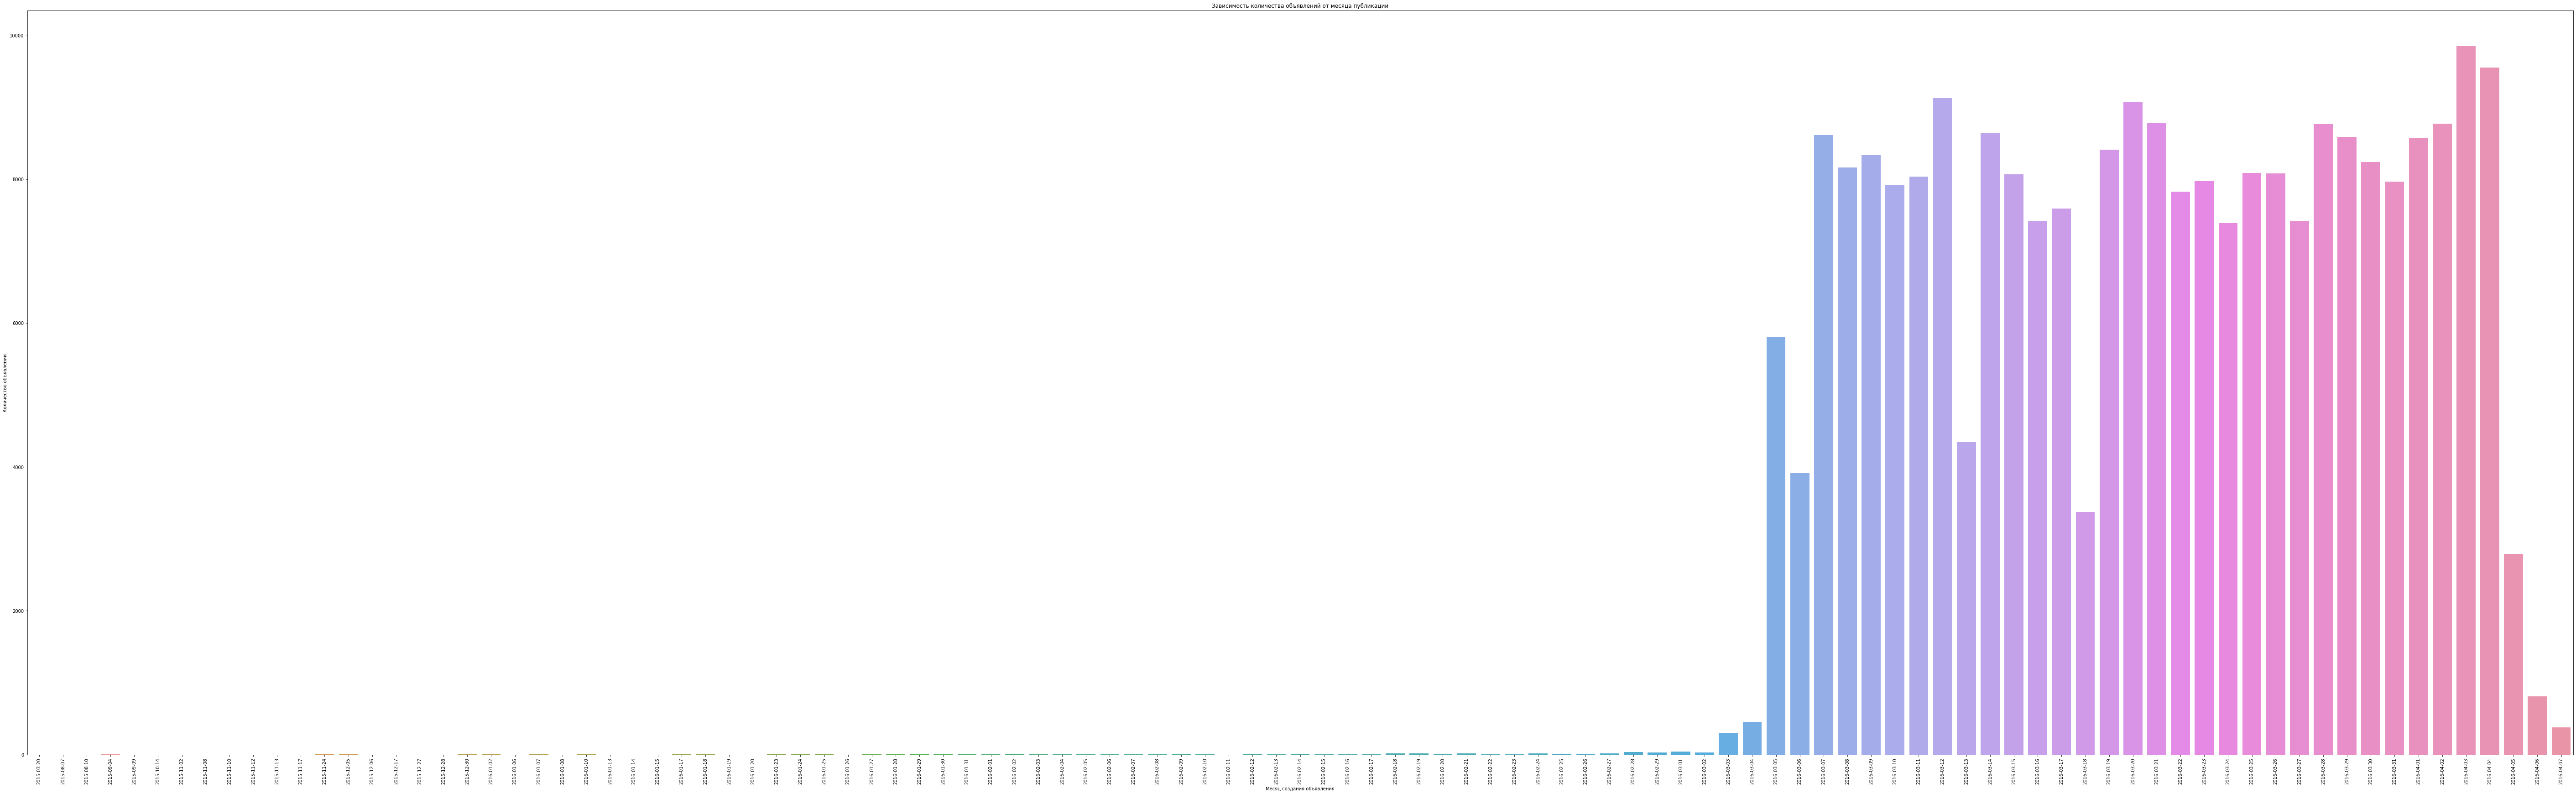

In [32]:
import matplotlib.pyplot as plt

data.loc[: , "dateCreated"] = pd.to_datetime(data["dateCreated"]).dt.date
fig, ax = plt.subplots(figsize=(100, 30))
ax = sns.countplot(x=data['dateCreated'].sort_values(), data=data)
ax.set(xlabel="Месяц создания объявления", ylabel='Количество объявлений', title="Зависимость количества объявлений от месяца публикации")
ax.tick_params(axis='x', rotation=90)
ax

Имеем, что большинство объявлений лежат опубликованы после 3 марта. Для анализа даты как категориального признака логично объединить редкие категории: даты, предшествущие 3 марта:

In [33]:
dividing_date = pd.to_datetime('20160303', format='%Y%m%d', errors='ignore')
data.loc[data['dateCreated'] < dividing_date, 'dateCreated'] = dividing_date

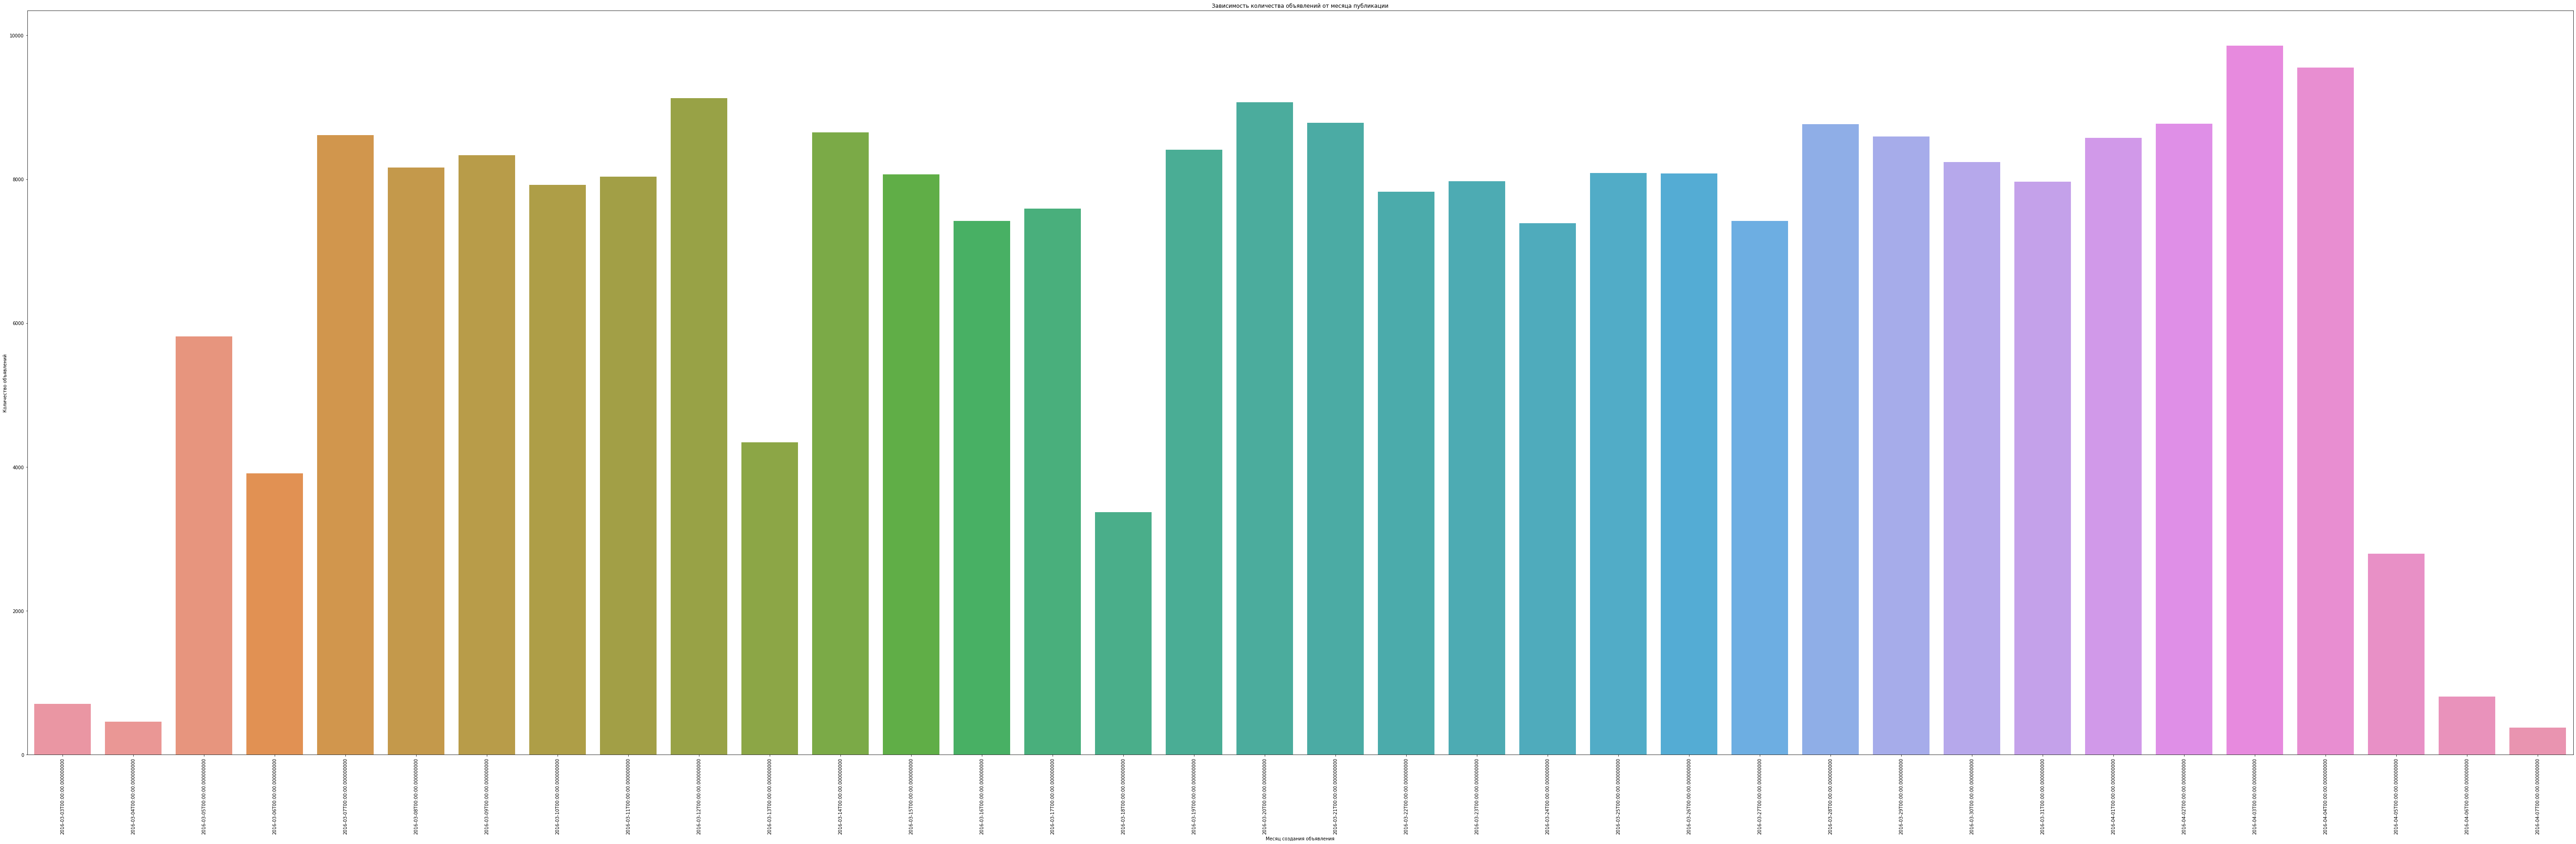

In [34]:
fig, ax = plt.subplots(figsize=(100, 30))
ax = sns.countplot(x=data['dateCreated'].sort_values(), data=data)
ax.set(xlabel="Месяц создания объявления", ylabel='Количество объявлений', title="Зависимость количества объявлений от месяца публикации")
ax.tick_params(axis='x', rotation=90)
ax

[Text(0, 0.5, 'Логарифм цены'),
 Text(0.5, 0, 'Месяц регистрации'),
 Text(0.5, 1.0, 'Зависимость логарифма цены от месяца ')]

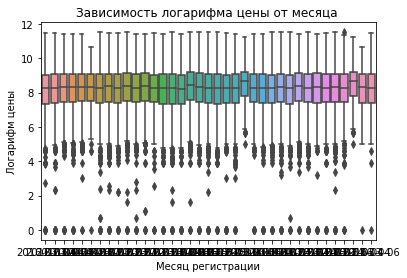

In [35]:
sns.boxplot(data=data, x='dateCreated', y='price_log').set(xlabel="Месяц регистрации", ylabel='Логарифм цены', title="Зависимость логарифма цены от месяца ")

Небольшое влияние даты создания объявления на таргет есть, потому этот фактор стоит оставить

Рассмотрим влияение переменной monthOfRegistration на таргет:

[Text(0, 0.5, 'Логарифм цены'),
 Text(0.5, 0, 'Месяц регистрации'),
 Text(0.5, 1.0, 'Зависимость логарифма цены от месяца ')]

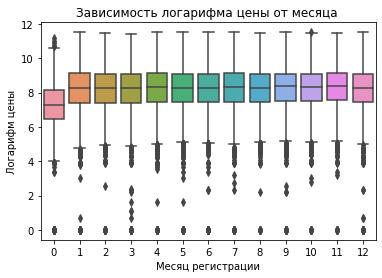

In [36]:
sns.boxplot(data=data, x='monthOfRegistration', y='price_log').set(xlabel="Месяц регистрации", ylabel='Логарифм цены', title="Зависимость логарифма цены от месяца ")

В целом, таргет не слишком зависит от месяцев с 1 по 12, но месяцев почему-то 13. Посмотрим количество объявлений по каждому:

In [37]:
data.groupby('monthOfRegistration').count()['brand']

monthOfRegistration
0      5642
1     17735
2     16498
3     26936
4     22510
5     21970
6     23776
7     20720
8     17079
9     18448
10    19877
11    18460
12    18221
Name: brand, dtype: int64

Судя по всему, в 0 месяце располагаются какие-то аномальные объявления. Переработаем данный признак. Объединим месяцы с 1 по 12, а 0 выставим отдельным "анормальным" месяцем:

In [38]:
data['is_abnormal_month'] = 0
data.loc[data['monthOfRegistration'] == 0, 'is_abnormal_month'] = 1
data = data.drop('monthOfRegistration', axis=1)

[Text(0, 0.5, 'Логарифм цены'),
 Text(0.5, 0, 'Месяц нестандатрный?'),
 Text(0.5, 1.0, 'Зависимость логарифма цены от месяца ')]

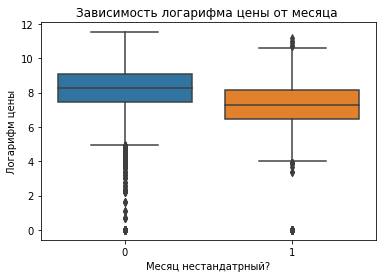

In [39]:
sns.boxplot(data=data, x='is_abnormal_month', y='price_log').set(xlabel="Месяц нестандатрный?", ylabel='Логарифм цены', title="Зависимость логарифма цены от месяца ")

Далее рассмотрим индекс. Влияение индекса на таргет не так очевидно, попробуем проанализировать зависимость. Так как индексов слишком много, попробуем взять сэмпл:

[Text(0, 0.5, 'Логарифм цены'),
 Text(0.5, 0, 'Индекс'),
 Text(0.5, 1.0, 'Зависимость логарифма цены от индекса (сэмпл)')]

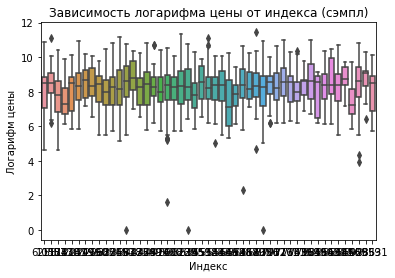

In [40]:
postal_code_sample = np.random.choice(data['postalCode'].values, 50)
data_for_sample = data.loc[np.in1d(data['postalCode'], postal_code_sample)]
sns.boxplot(data=data_for_sample, x='postalCode', y='price_log').set(xlabel="Индекс", ylabel='Логарифм цены', title="Зависимость логарифма цены от индекса (сэмпл)")

Очевидно, индекс влияет на таргет. Но при этом индексов слишком много, чтобы кодировать их напрямую. Попробуем округлить индексы:

[Text(0, 0.5, 'Логарифм цены'),
 Text(0.5, 0, 'Индекс'),
 Text(0.5, 1.0, 'Зависимость логарифма цены от индекса (сэмпл)')]

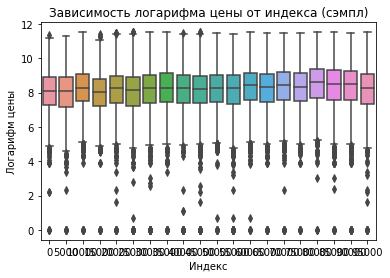

In [41]:
tolerance = 5000
data['postalCode'] = data['postalCode'] // tolerance * tolerance
data['postalCode'].unique()
sns.boxplot(data=data, x='postalCode', y='price_log').set(xlabel="Индекс", ylabel='Логарифм цены', title="Зависимость логарифма цены от индекса (сэмпл)")

на очереди признак - lastSeen, так же округлим до даты:

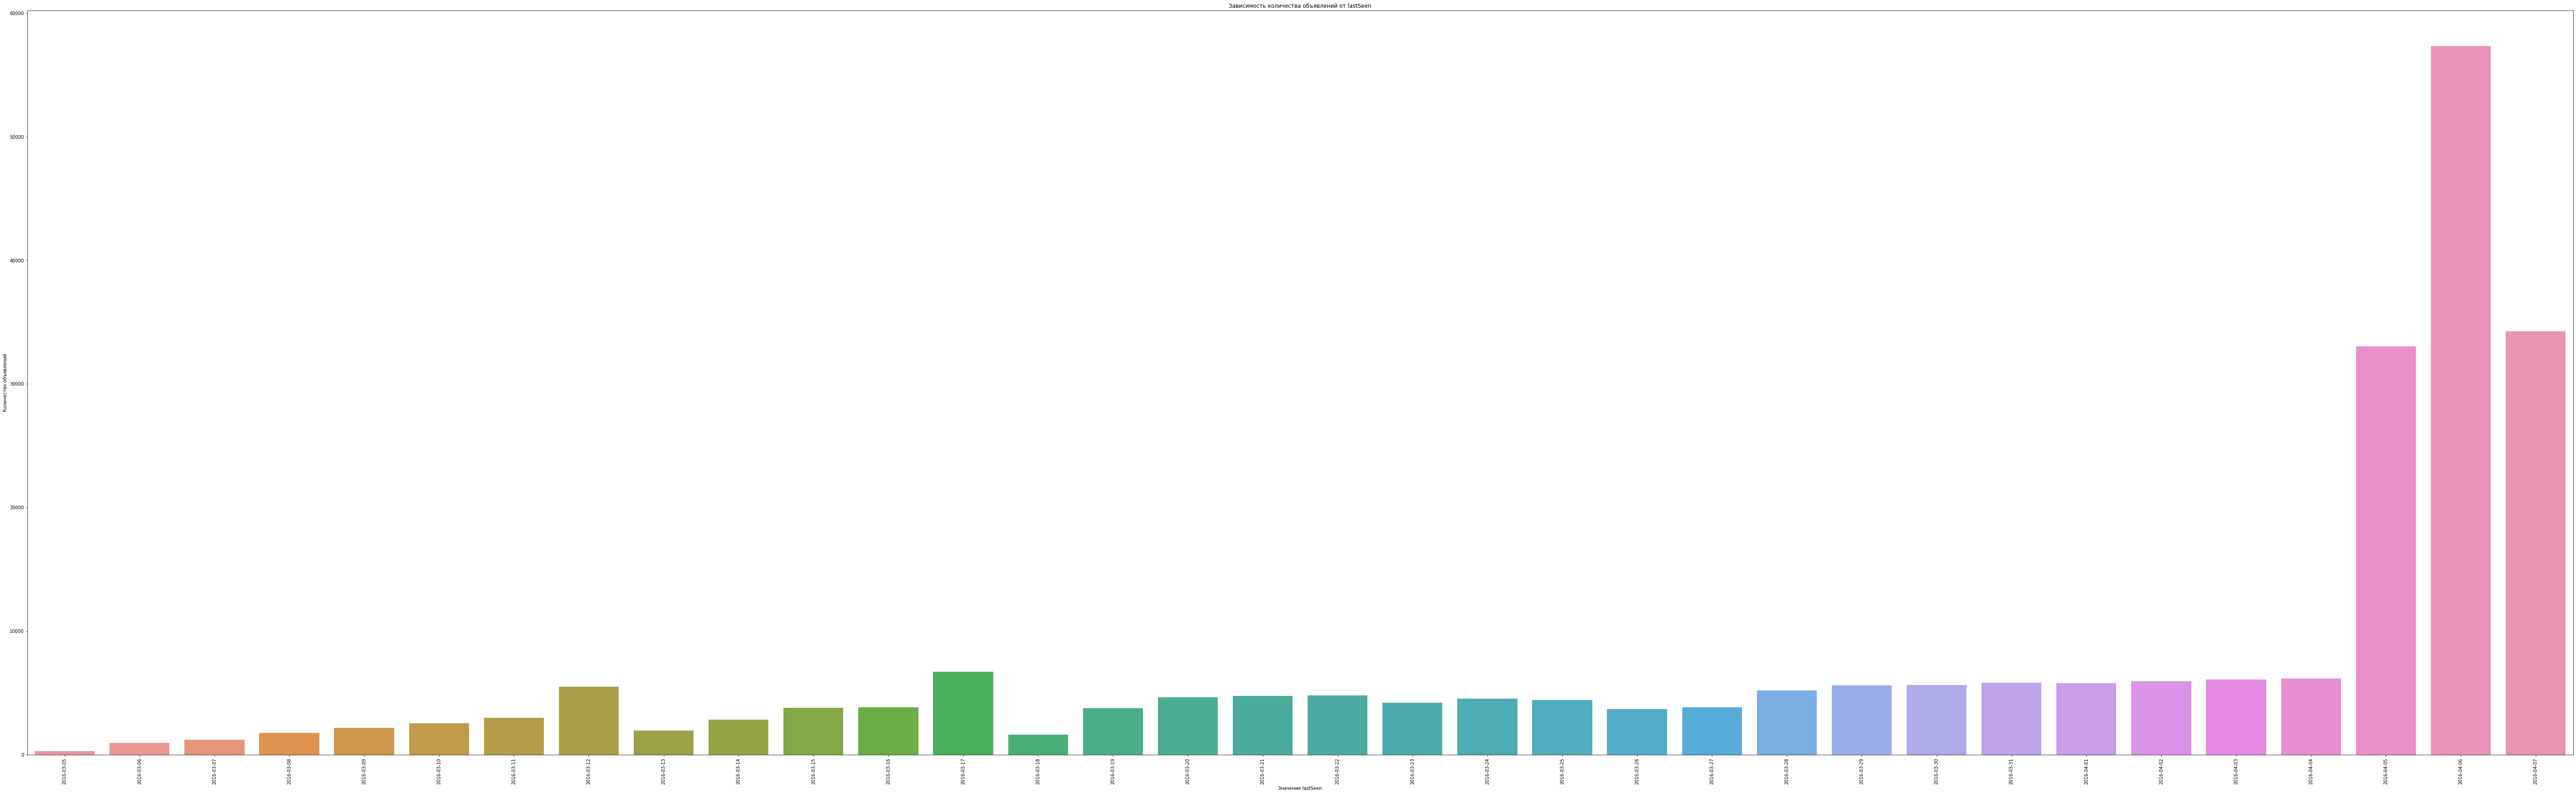

In [42]:
data.loc[: , "lastSeen"] = pd.to_datetime(data["lastSeen"]).dt.date
fig, ax = plt.subplots(figsize=(100, 30))
ax = sns.countplot(x=data['lastSeen'].sort_values(), data=data)
ax.set(xlabel="Значение lastSeen", ylabel='Количество объявлений', title="Зависимость количества объявлений от lastSeen")
ax.tick_params(axis='x', rotation=90)
ax

[Text(0, 0.5, 'Логарифм цены'),
 Text(0.5, 0, 'Значение lastSeen регистрации'),
 Text(0.5, 1.0, 'Зависимость логарифма цены от lastSeen')]

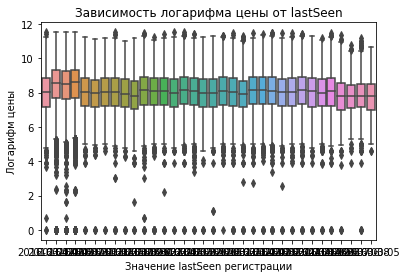

In [43]:
sns.boxplot(data=data, x='lastSeen', y='price_log').set(xlabel="Значение lastSeen регистрации", ylabel='Логарифм цены', title="Зависимость логарифма цены от lastSeen")

Влияние неочевидно. Попробуем аналогично объединить все "старые" объявления (все, кроме 3 наиболее поздних):

In [44]:
dividing_date = pd.to_datetime('20160404', format='%Y%m%d', errors='ignore')
data.loc[data['lastSeen'] < dividing_date, 'lastSeen'] = dividing_date

In [45]:
data

,brand,model,vehicleType,powerPS,kilometer,yearOfRegistration,dateCreated,lastSeen,postalCode,is_auto_gearbox,is_diesel,price_log,is_abnormal_month
0,volkswagen,golf,kleinwagen,75,150000,2001,2016-03-17,2016-04-04 00:00:00,90000,0,0,7.313220,0
1,skoda,fabia,kleinwagen,69,90000,2008,2016-03-31,2016-04-06,60000,0,1,8.188689,0
2,bmw,3er,limousine,102,150000,1995,2016-04-04,2016-04-06,30000,0,0,6.476972,0
3,peugeot,2_reihe,cabrio,109,150000,2004,2016-04-01,2016-04-05,65000,0,0,7.696213,0
4,mazda,3_reihe,limousine,105,150000,2004,2016-03-26,2016-04-06,95000,0,0,7.600902,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
247867,bmw,3er,kombi,3,150000,2005,2016-04-02,2016-04-06,80000,0,1,8.293800,0
247868,seat,leon,limousine,225,150000,2004,2016-03-19,2016-04-04 00:00:00,95000,0,0,8.070906,0
247869,smart,fortwo,cabrio,101,125000,2000,2016-03-05,2016-04-04 00:00:00,25000,1,0,7.089243,0
247870,volkswagen,transporter,bus,102,150000,1996,2016-03-19,2016-04-07,85000,0,1,9.126959,0


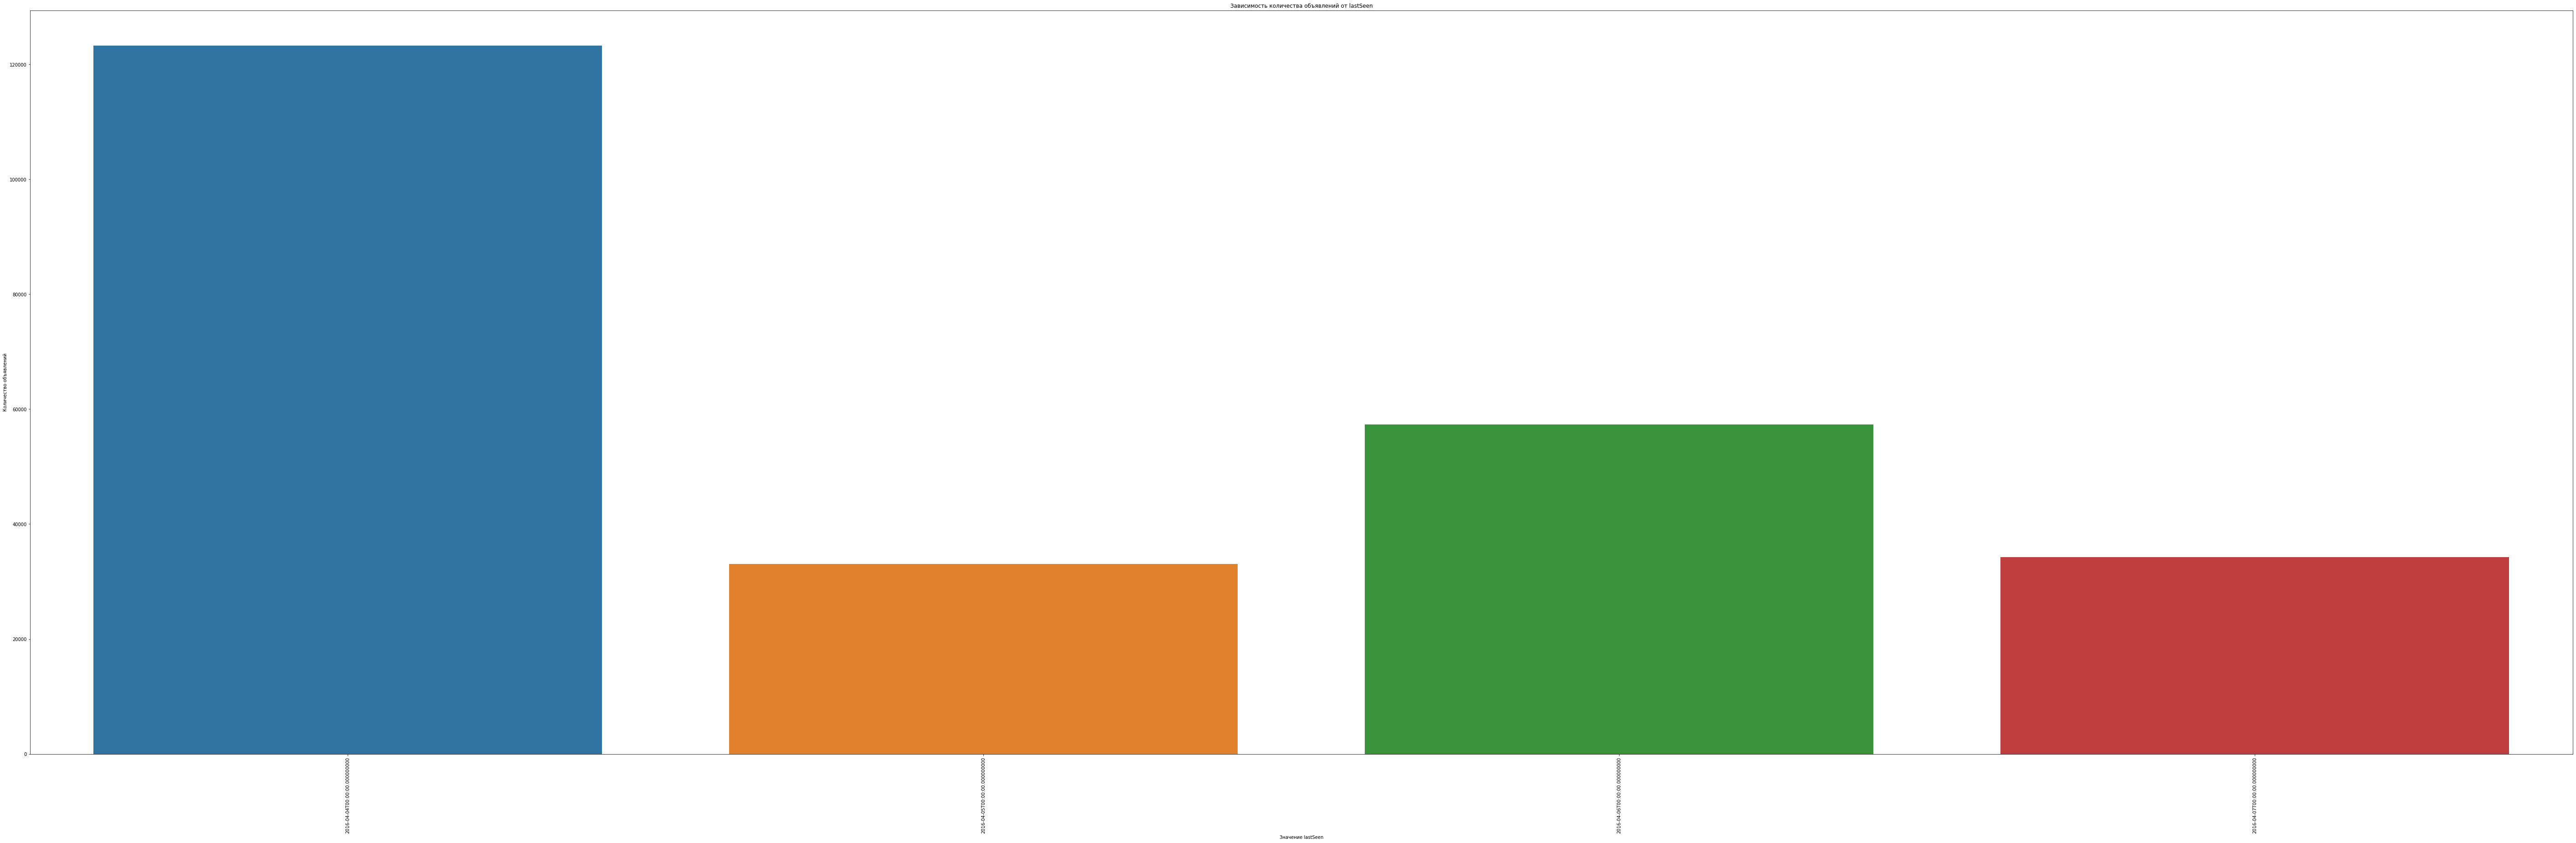

In [46]:
fig, ax = plt.subplots(figsize=(100, 30))
ax = sns.countplot(x=data['lastSeen'].sort_values(), data=data)
ax.set(xlabel="Значение lastSeen", ylabel='Количество объявлений', title="Зависимость количества объявлений от lastSeen")
ax.tick_params(axis='x', rotation=90)
ax

[Text(0, 0.5, 'Логарифм цены'),
 Text(0.5, 0, 'Значение lastSeen регистрации'),
 Text(0.5, 1.0, 'Зависимость логарифма цены от lastSeen')]

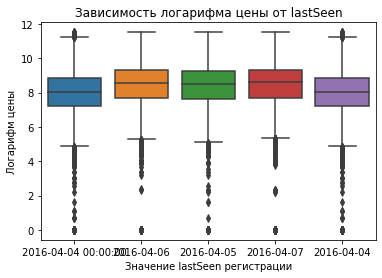

In [47]:
sns.boxplot(data=data, x='lastSeen', y='price_log').set(xlabel="Значение lastSeen регистрации", ylabel='Логарифм цены', title="Зависимость логарифма цены от lastSeen")

Рационально будет заменить lastSeen на бинарный признак - свежее ли объявление:

In [48]:
data['is_recent'] = 0
data.loc[data['lastSeen'] > dividing_date, 'is_recent'] = 1
data = data.drop('lastSeen', axis=1)

[Text(0, 0.5, 'Логарифм цены'),
 Text(0.5, 0, 'Объявление свежее?'),
 Text(0.5, 1.0, 'Зависимость логарифма цены от того, свежее ли объявление')]

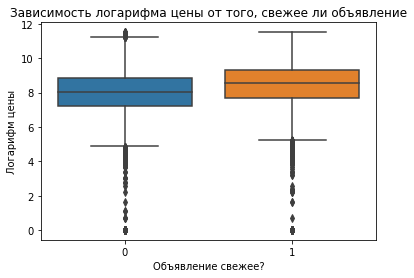

In [49]:
sns.boxplot(data=data, x='is_recent', y='price_log').set(xlabel="Объявление свежее?", ylabel='Логарифм цены', title="Зависимость логарифма цены от того, свежее ли объявление")

В качестве последнего штриха сконкатенируем бренд и модель машины, ведь их имеет смысл рассматривать в комбинации вместе:

In [50]:
data.loc[:, 'name'] = data['brand'] + ' ' + data['model']
data = data.drop(['brand', 'model'], axis=1)
data

,vehicleType,powerPS,kilometer,yearOfRegistration,dateCreated,postalCode,is_auto_gearbox,is_diesel,price_log,is_abnormal_month,is_recent,name
0,kleinwagen,75,150000,2001,2016-03-17,90000,0,0,7.313220,0,0,volkswagen golf
1,kleinwagen,69,90000,2008,2016-03-31,60000,0,1,8.188689,0,1,skoda fabia
2,limousine,102,150000,1995,2016-04-04,30000,0,0,6.476972,0,1,bmw 3er
3,cabrio,109,150000,2004,2016-04-01,65000,0,0,7.696213,0,1,peugeot 2_reihe
4,limousine,105,150000,2004,2016-03-26,95000,0,0,7.600902,0,1,mazda 3_reihe
...,...,...,...,...,...,...,...,...,...,...,...,...
247867,kombi,3,150000,2005,2016-04-02,80000,0,1,8.293800,0,1,bmw 3er
247868,limousine,225,150000,2004,2016-03-19,95000,0,0,8.070906,0,0,seat leon
247869,cabrio,101,125000,2000,2016-03-05,25000,1,0,7.089243,0,0,smart fortwo
247870,bus,102,150000,1996,2016-03-19,85000,0,1,9.126959,0,1,volkswagen transporter


Теперь соберем пайплайн для обработки столбцов:

In [51]:
data.columns

Index(['vehicleType', 'powerPS', 'kilometer', 'yearOfRegistration',
       'dateCreated', 'postalCode', 'is_auto_gearbox', 'is_diesel',
       'price_log', 'is_abnormal_month', 'is_recent', 'name'],
      dtype='object')

Разделим столбцы на категориальные и числовые признаки

In [52]:
categorical_features = ['vehicleType', 'yearOfRegistration',  'dateCreated', 'postalCode', "is_auto_gearbox", "is_diesel", 'is_abnormal_month', 'is_recent', 'name']
numeric_features = ['powerPS', 'kilometer']

Для категориальных признаков воспользуемся OHE, для числовых - разбиение на n интервалов (наиболее вероятно, что для пробега и мощности важна не конкретная цифра, а попадание в интервал)

In [53]:
from sklearn.preprocessing import KBinsDiscretizer, OneHotEncoder
from sklearn.compose import ColumnTransformer

numberOfBins = 5
column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown="ignore", sparse=False), categorical_features),
    ('discretizing', KBinsDiscretizer(n_bins=numberOfBins), numeric_features)
])

In [54]:
features = data.columns.drop('price_log')
features

Index(['vehicleType', 'powerPS', 'kilometer', 'yearOfRegistration',
       'dateCreated', 'postalCode', 'is_auto_gearbox', 'is_diesel',
       'is_abnormal_month', 'is_recent', 'name'],
      dtype='object')

In [55]:
from sklearn.model_selection import train_test_split

train_x, test_val_x, train_y, test_val_y = train_test_split(data[features], data['price_log'], test_size=0.4, random_state=10)
test_x, val_x, test_y, val_y = train_test_split(test_val_x, test_val_y, test_size=0.5, random_state=10)
print("Размер обучающей выборки (X): " + str(train_x.shape[0]))
print("Размер обучающей выборки (Y): " + str(train_y.shape[0]))
print()
print("Размер тестовой выборк (X): " + str(test_x.shape[0]))
print("Размер тестовой выборки (Y): " + str(test_y.shape[0]))
print()
print("Размер валидационной выборки (X): " + str(val_x.shape[0]))
print("Размер валидационной выборки (Y): " + str(val_y.shape[0]))


Размер обучающей выборки (X): 148723
Размер обучающей выборки (Y): 148723

Размер тестовой выборк (X): 49574
Размер тестовой выборки (Y): 49574

Размер валидационной выборки (X): 49575
Размер валидационной выборки (Y): 49575


In [56]:
train_x.reset_index(inplace=True)
test_x.reset_index(inplace=True)
val_x.reset_index(inplace=True)

train_x_processed = column_transformer.fit_transform(train_x)
val_x_processed = column_transformer.transform(val_x)
test_x_processed = column_transformer.transform(test_x)
print(train_x_processed.shape)
print(val_x_processed.shape)
print(test_x_processed.shape)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/preprocessing/_discretization.py:202: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.
  'decreasing the number of bins.' % jj)


(148723, 456)
(49575, 456)
(49574, 456)


## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

* **Задание 5.1. (1.5 балла)** Подберите по валидационной выборке наилучшую длину $\lambda$ шага для каждого метода. Для этого можно сделать перебор по логарифмической сетке, так как нас интересует скорее порядок величины, нежели её точное значение. Сравните качество методов по метрикам MSE и R^2 на обучающей и тестовой выборках, сравните количество итераций до сходимости. Все параметры кроме $\lambda$ стоит выставить равным значениям по умолчанию.

* **Задание 5.2. (0.5 балла)** Постройте график зависимости значения функции ошибки от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты. Сравните методы между собой.

In [57]:
from utils import (
    Adagrad,
    GradientDescent,
    MomentumDescent,
    StochasticDescent,
)
from utils import LinearRegression

In [58]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

w0 = np.zeros(train_x_processed.shape[1])
print(w0.shape)
lambdas = np.logspace(-3, 1, 5)

(456,)


Для начала поработаем с полным градиентным спуском. На данном этапе при больших значениях lambda возможны переполнения. Так как в дальнейшем мы разведем обучения для разных значений lambda в разные потоки, можно просто игнорировать возникающие исключения. В тех случаях, когда произойдет переполнение, мы просто проигнорируем значение lambda

In [206]:
results_grad_descent = {}
from threading import Thread

def process_lambda(lambda_value):
    print("Работа с lambda=" + str(lambda_value))
    descent = GradientDescent(lambda_ = lambda_value, w0 = w0.copy())
    regression = LinearRegression(descent = descent)
    regression.fit(val_x_processed, val_y)
    predict = regression.predict(val_x_processed)
    mse = mean_squared_error(val_y, predict)
    r2 = r2_score(val_y, predict)
    results_grad_descent[lambda_value] = [mse, r2]
    
threads = []

for lambda_value in lambdas:
    process = Thread(target=process_lambda, args=[lambda_value])
    process.start()
    threads.append(process)

for process in threads:
    process.join()
    
print("Работа окончена!")

Работа с lambda=0.001
Работа с lambda=0.01Работа с lambda=0.1

Работа с lambda=1.0
Работа с lambda=10.0


/Users/arsenyneustroev/Desktop/Educational/HSE/ML/ml-course-hse/2020-fall/homeworks-practice/homework-practice-03-gd/utils.py:91: RuntimeWarning: overflow encountered in multiply
  return 2 * np.dot(X.T, np.dot(X, self.w) - y) / y.shape[0]


Работа окончена!


Exception in thread Thread-132:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-206-f81ce2436464>", line 10, in process_lambda
    mse = mean_squared_error(val_y, predict)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py", line 72, in inner_f
    return f(**kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/_regression.py", line 256, in mean_squared_error
    y_true, y_pred, multioutput)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/_regression.py", line 86, in _check_reg_targets
    y_pred = check_array(y_pred, ensure_2d=

In [207]:
for lambda_value, data in sorted(results_grad_descent.items()):
    print('Lambda=' + str(lambda_value))
    print('MSE=' + str(data[0]))
    print('R2=' + str(data[1]))
    print()

Lambda=0.001
MSE=35.97951762115339
R2=-25.18881690830752

Lambda=0.01
MSE=2.2249172870846285
R2=-0.6194756161302788

Lambda=0.1
MSE=0.5834908155732564
R2=0.5752879652910371

Lambda=1.0
MSE=0.3331504123230927
R2=0.7575060554417476



Для спуска с полным градиентом оптимальным будет значение лямбды порядка 1. Продолжим со стохастическим спуском

In [208]:
results_stoch_descent = {}
from threading import Thread

def process_lambda(lambda_value):
    print("Работа с lambda=" + str(lambda_value))
    descent = StochasticDescent(lambda_ = lambda_value, w0 = w0.copy())
    regression = LinearRegression(descent = descent)
    regression.fit(val_x_processed, val_y)
    predict = regression.predict(val_x_processed)
    mse = mean_squared_error(val_y, predict)
    r2 = r2_score(val_y, predict)
    results_stoch_descent[lambda_value] = [mse, r2]
    
threads = []

for lambda_value in lambdas:
    process = Thread(target=process_lambda, args=[lambda_value])
    process.start()
    threads.append(process)

for process in threads:
    process.join()
    
print("Работа окончена!")

Работа с lambda=0.001Работа с lambda=0.01

Работа с lambda=0.1Работа с lambda=1.0Работа с lambda=10.0




/Users/arsenyneustroev/Desktop/Educational/HSE/ML/ml-course-hse/2020-fall/homeworks-practice/homework-practice-03-gd/utils.py:134: RuntimeWarning: overflow encountered in multiply
  return 2 * np.dot(X_batch.T, np.dot(X_batch, self.w) - y_batch) / self.batch_size


Работа окончена!


Exception in thread Thread-137:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-208-734a455e3833>", line 10, in process_lambda
    mse = mean_squared_error(val_y, predict)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py", line 72, in inner_f
    return f(**kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/_regression.py", line 256, in mean_squared_error
    y_true, y_pred, multioutput)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/_regression.py", line 86, in _check_reg_targets
    y_pred = check_array(y_pred, ensure_2d=

In [209]:
for lambda_value, data in sorted(results_stoch_descent.items()):
    print('Lambda=' + str(lambda_value))
    print('MSE=' + str(data[0]))
    print('R2=' + str(data[1]))
    print()

Lambda=0.001
MSE=37.26270184806257
R2=-26.12282267047469

Lambda=0.01
MSE=2.3675944132404814
R2=-0.7233276236319663

Lambda=0.1
MSE=0.5342236088831398
R2=0.611148642167723

Lambda=1.0
MSE=47140886.4805301
R2=-34312967.226346545



Стохастический градиентный спуск показывает лучшие результаты при lambda порядка 0.1. Продолжим с Momentum:

In [210]:
results_momentum_descent = {}
from threading import Thread

def process_lambda(lambda_value):
    print("Работа с lambda=" + str(lambda_value))
    descent = MomentumDescent(lambda_ = lambda_value, w0 = w0.copy())
    regression = LinearRegression(descent = descent)
    regression.fit(val_x_processed, val_y)
    predict = regression.predict(val_x_processed)
    mse = mean_squared_error(val_y, predict)
    r2 = r2_score(val_y, predict)
    results_momentum_descent[lambda_value] = [mse, r2]
    
threads = []

for lambda_value in lambdas:
    process = Thread(target=process_lambda, args=[lambda_value])
    process.start()
    threads.append(process)

for process in threads:
    process.join()
    
print("Работа окончена!")

Работа с lambda=0.001Работа с lambda=0.01

Работа с lambda=0.1Работа с lambda=1.0Работа с lambda=10.0




/Users/arsenyneustroev/Desktop/Educational/HSE/ML/ml-course-hse/2020-fall/homeworks-practice/homework-practice-03-gd/utils.py:176: RuntimeWarning: overflow encountered in multiply
  return 2 * np.dot(X.T, np.dot(X, self.w) - y) / y.shape[0]


Работа окончена!


Exception in thread Thread-142:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-210-e26998eec3d7>", line 10, in process_lambda
    mse = mean_squared_error(val_y, predict)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py", line 72, in inner_f
    return f(**kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/_regression.py", line 256, in mean_squared_error
    y_true, y_pred, multioutput)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/_regression.py", line 86, in _check_reg_targets
    y_pred = check_array(y_pred, ensure_2d=

In [211]:
for lambda_value, data in sorted(results_momentum_descent.items()):
    print('Lambda=' + str(lambda_value))
    print('MSE=' + str(data[0]))
    print('R2=' + str(data[1]))
    print()

Lambda=0.001
MSE=32.343543228647206
R2=-22.54225925705498

Lambda=0.01
MSE=2.0964049433570078
R2=-0.5259338884234732

Lambda=0.1
MSE=0.5668270374249628
R2=0.5874172172593777

Lambda=1.0
MSE=0.32834520147040963
R2=0.761003678410232



Моментум лучше всего ведет себя с lambda порядка 1. Продолжим с Adagrad:

In [212]:
results_adagrad_descent = {}

def process_lambda(lambda_value):
    print("Работа с lambda=" + str(lambda_value))
    descent = Adagrad(lambda_ = lambda_value, w0 = w0.copy())
    regression = LinearRegression(descent = descent)
    regression.fit(val_x_processed, val_y)
    predict = regression.predict(val_x_processed)
    mse = mean_squared_error(val_y, predict)
    r2 = r2_score(val_y, predict)
    results_adagrad_descent[lambda_value] = [mse, r2]
    
threads = []

for lambda_value in lambdas:
    process = Thread(target=process_lambda, args=[lambda_value])
    process.start()
    threads.append(process)

for process in threads:
    process.join()
    
print("Работа окончена!")

Работа с lambda=0.001Работа с lambda=0.01
Работа с lambda=0.1
Работа с lambda=1.0Работа с lambda=10.0


Работа окончена!


In [213]:
for lambda_value, data in sorted(results_adagrad_descent.items()):
    print('Lambda=' + str(lambda_value))
    print('MSE=' + str(data[0]))
    print('R2=' + str(data[1]))
    print()

Lambda=0.001
MSE=68.6139690480098
R2=-48.942822793548174

Lambda=0.01
MSE=59.08408520313256
R2=-42.006198856594814

Lambda=0.1
MSE=3.403388198396324
R2=-1.477262517363307

Lambda=1.0
MSE=0.27907464868618886
R2=0.7968667908461372

Lambda=10.0
MSE=0.27970371003215705
R2=0.7964089088759807



Adagrad лучше всего ведет себя с lambda порядка 1

In [59]:
full_regression = LinearRegression(descent = GradientDescent(lambda_ = 1, w0 = w0.copy()))
stochastic_regression = LinearRegression(descent = StochasticDescent(lambda_ = 0.1, w0 = w0.copy()))
momentum_regression = LinearRegression(descent = MomentumDescent(lambda_ = 1, w0 = w0.copy()))
adagrad_regression = LinearRegression(descent = Adagrad(lambda_ = 1, w0 = w0.copy()))

results = {}

def test_regression(regression_name, regression):
    print("Анализ: " + regression_name)
    regression.fit(train_x_processed, train_y)
    predict_train = regression.predict(train_x_processed)
    predict_test = regression.predict(test_x_processed)
    mse_train = mean_squared_error(train_y, predict_train)
    mse_test = mean_squared_error(test_y, predict_test)
    r2_train = r2_score(train_y, predict_train)
    r2_test = r2_score(test_y, predict_test)
    results[regression_name] = [mse_train, mse_test, r2_train, r2_test, regression.loss_history]

regressions = {
    'Спуск с полным градиентом': full_regression, 
    'СГА': stochastic_regression, 
    'Momentum': momentum_regression, 
    'Adagrad': adagrad_regression}


threads = []

for regression_name, regression in regressions.items():
    process = Thread(target=test_regression, args=[regression_name, regression])
    process.start()
    threads.append(process)

for process in threads:
    process.join()
    
print("Работа окончена!")

Анализ: Спуск с полным градиентомАнализ: СГА
Анализ: Momentum

Анализ: Adagrad
Работа окончена!


In [60]:
for name, data in results.items():
    print('Тип: ' + name)
    print('MSE train=' + str(data[0]))
    print('MSE test=' + str(data[1]))    
    print('R2 train=' + str(data[2]))    
    print('R2 test=' + str(data[3]))
    print('Пройдено шагов:' + str(len(data[4])))
    print()

Тип: СГА
MSE train=0.537109169100866
MSE test=0.5630940792038839
R2 train=0.6099793486860172
R2 test=0.5993784724450386
Пройдено шагов:1000

Тип: Спуск с полным градиентом
MSE train=0.3362516513596589
MSE test=0.3640985145586135
R2 train=0.7558315969763902
R2 test=0.7409567806338995
Пройдено шагов:799

Тип: Momentum
MSE train=0.33147473797402494
MSE test=0.3593472489783585
R2 train=0.7593003422094204
R2 test=0.744337138099693
Пройдено шагов:811

Тип: Adagrad
MSE train=0.2818899936689031
MSE test=0.3111542804590413
R2 train=0.795306196105929
R2 test=0.7786247312012117
Пройдено шагов:1000



In [61]:
df_no_reg = pd.DataFrame(columns=['descent', 'iteration', 'loss'])
for descent, data in results.items():
    for i in range(len(data[4])):
        df_no_reg = df_no_reg.append({'descent': descent, 'iteration': i, 'loss': data[4][i]}, ignore_index=True)
df_no_reg

,descent,iteration,loss
0,СГА,0,69.174670
1,СГА,1,9.642584
2,СГА,2,3.522421
3,СГА,3,2.855507
4,СГА,4,2.742641
...,...,...,...
3605,Adagrad,995,0.281903
3606,Adagrad,996,0.281900
3607,Adagrad,997,0.281898
3608,Adagrad,998,0.281895


Text(0.5, 0.98, 'Все градиенты')

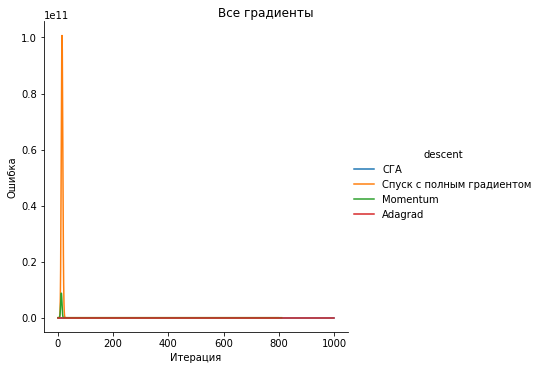

In [62]:
import seaborn as sns
gr = sns.relplot(data=df_no_reg, x='iteration', y='loss', hue='descent', kind="line").set_axis_labels("Итерация", "Ошибка")
gr.fig.suptitle("Все градиенты")

Text(0.5, 0.98, 'Adagrad')

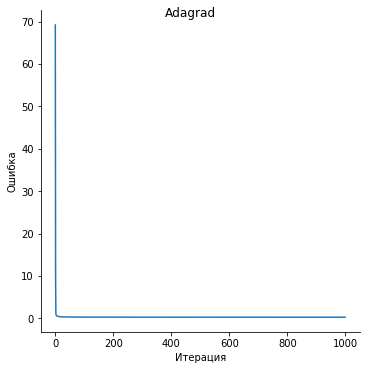

In [63]:
gr = sns.relplot(data=df_no_reg.loc[df_no_reg['descent'] == 'Adagrad'], x='iteration', y='loss', kind="line").set_axis_labels("Итерация", "Ошибка")
gr.fig.suptitle("Adagrad")

Text(0.5, 0.98, 'Стохастический спуск')

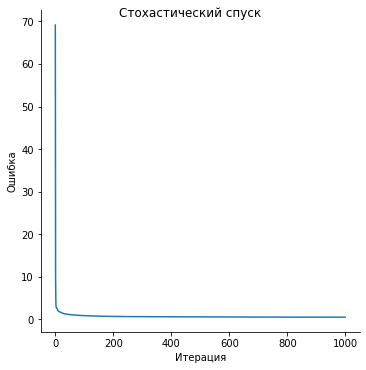

In [64]:
gr = sns.relplot(data=df_no_reg.loc[df_no_reg['descent'] == 'СГА'], x='iteration', y='loss', kind="line").set_axis_labels("Итерация", "Ошибка")
gr.fig.suptitle("Стохастический спуск")

Text(0.5, 0.98, 'Momentum')

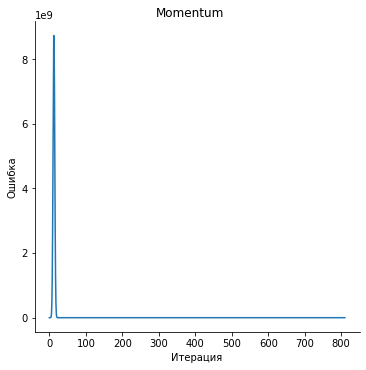

In [65]:
gr = sns.relplot(data=df_no_reg.loc[df_no_reg['descent'] == 'Momentum'], x='iteration', y='loss', kind="line").set_axis_labels("Итерация", "Ошибка")
gr.fig.suptitle("Momentum")

Text(0.5, 0.98, 'Спуск с полным градиентом')

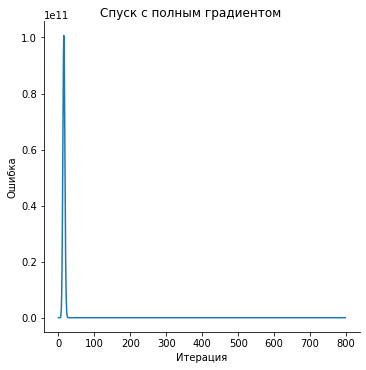

In [67]:
gr = sns.relplot(data=df_no_reg.loc[df_no_reg['descent'] == 'Спуск с полным градиентом'], x='iteration', y='loss', kind="line").set_axis_labels("Итерация", "Ошибка")
gr.fig.suptitle("Спуск с полным градиентом")

## Задание 6. Сходимость стохастического градиентного спуска в зависимости от размера батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска. 

* Сделайте по несколько запусков (например, k) стохастического градиентного спуска на обучающей выборке для каждого размера батча из списка. Замерьте время и количество итераций до сходимости. Посчитайте среднее и дисперсию этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча.
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

In [ ]:
import time
# пришлось увеличить шаг для размера, чтобы не ждать слишком долго
batch_sizes = np.arange(5, 500, 50)

# YOUR CODE:
k = 3
results = {}

def process_batch(batch_size):
    iters = np.array([])
    times = np.array([])
    for i in range(k):
        time_start = time.time()
        regression = LinearRegression(descent = StochasticDescent(lambda_ = 0.1, w0 = w0.copy(), batch_size=batch_size), max_iter = 1000)
        regression.fit(train_x_processed, train_y)
        time_end = time.time()
        time_difference = time_end - time_start
        iters = np.append(iters, len(regression.loss_history))
        times = np.append(times, time_difference)
    results[batch_size] = [iters.mean(), iters.std(), times.mean(), times.std()]
    print(batch_size)
    print(results[batch_size])
    
threads = []

for batch_size in batch_sizes:
    process = Thread(target=process_batch, args=[batch_size])
    process.start()
    threads.append(process)

for process in threads:
    process.join()
    
print("Работа окончена!")      

In [257]:

df = pd.DataFrame(columns=['batch_size', 'mean_iters', 'std_iters', 'mean_time', 'std_time'])
for size, data in sorted(results.items()):
    print('Для размера батча:' + str(size))
    print('Среднее количество итераций: ' + str(data[0]) + ', отклонение=' + str(data[1]))
    print('Среднее время спуска: ' + str(data[2]) + ', отклонение=' + str(data[3]))
    print()
    df = df.append({'batch_size': size, 'mean_iters': data[0], 'std_iters': data[1], 'mean_time': data[2], 'std_time': data[3]}, ignore_index=True)


Для размера батча:5
Среднее количество итераций: 1000.0, отклонение=0.0
Среднее время спуска: 142.62624917030334, отклонение=30.406317325602483

Для размера батча:55
Среднее количество итераций: 1000.0, отклонение=0.0
Среднее время спуска: 152.4359660625458, отклонение=69.7370746722955

Для размера батча:105
Среднее количество итераций: 879.0, отклонение=55.59496380068972
Среднее время спуска: 148.44404582977296, отклонение=55.480256710006294

Для размера батча:155
Среднее количество итераций: 668.6, отклонение=41.66341320631329
Среднее время спуска: 133.3016231060028, отклонение=15.590505128283992

Для размера батча:205
Среднее количество итераций: 693.0, отклонение=53.34041619635152
Среднее время спуска: 135.75011281967164, отклонение=29.016114467597045

Для размера батча:255
Среднее количество итераций: 578.2, отклонение=20.50755958177374
Среднее время спуска: 123.82758288383484, отклонение=7.29365153512959

Для размера батча:305
Среднее количество итераций: 578.6, отклонение=29.923

Text(0.5, 0.98, 'Зависимость среднего количества итераций от размера батча')

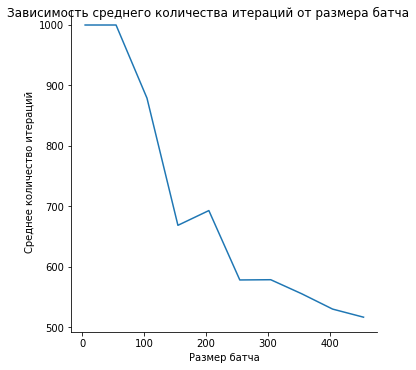

In [254]:
gr = sns.relplot(data=df, x='batch_size', y='mean_iters', kind="line").set_axis_labels("Размер батча", "Среднее количество итераций")
gr.fig.suptitle("Зависимость среднего количества итераций от размера батча")

Text(0.5, 0.98, 'Зависимость среднего времени спуска от размера батча')

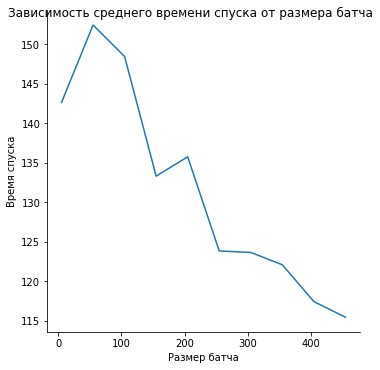

In [255]:
gr = sns.relplot(data=df, x='batch_size', y='mean_time', kind="line").set_axis_labels("Размер батча", "Время спуска")
gr.fig.suptitle("Зависимость среднего времени спуска от размера батча")

## Задание 7. Регуляризация (1 балл)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. (Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов). Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите классы **GradientDescentReg**, **StochasticDescentReg**, **MomentumDescentReg**, **AdagradReg** в файле `utils.py`. Мы будем использовать тот же самый класс для линейной регрессии, так как для сравнения методов с регуляризацией и без неё нам нужна только MSE часть функции потерь.

Найдите по валидационной выборке лучшие параметры обучения с регуляризацией. Сравните для каждого метода результаты на тестовой выборке по метрикам MSE и R^2 с регуляризацией и без регуляризации. Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации.

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Чем вы можете объяснить это?

In [70]:
from utils import (
    AdagradReg,
    GradientDescentReg,
    MomentumDescentReg,
    StochasticDescentReg,
)

from threading import Thread


mus = np.logspace(-7, -3, 5)

Начнем с полного градиента:

In [71]:
results_grad_descent = {}

best_lambda = 1

def process_mu(mu):
    print("Работа с mu=" + str(mu))
    descent = GradientDescentReg(lambda_ = best_lambda, w0 = w0.copy(), mu = mu)
    regression = LinearRegression(descent = descent)
    regression.fit(val_x_processed, val_y)
    predict = regression.predict(val_x_processed)
    mse = mean_squared_error(val_y, predict)
    r2 = r2_score(val_y, predict)
    results_grad_descent[mu] = [mse, r2]
    
threads = []

for mu in mus:
    process = Thread(target=process_mu, args=[mu])
    process.start()
    threads.append(process)

for process in threads:
    process.join()
    
print("Работа окончена!")

Работа с mu=1e-07
Работа с mu=1e-06Работа с mu=1e-05Работа с mu=0.0001

Работа с mu=0.001

Работа окончена!


In [72]:
for mu, data in sorted(results_grad_descent.items()):
    print('Mu=' + str(mu))
    print('MSE=' + str(data[0]))
    print('R2=' + str(data[1]))
    print()

Mu=1e-07
MSE=0.3331505885785848
R2=0.7575059271486766

Mu=1e-06
MSE=0.33315217492383137
R2=0.7575047724776871

Mu=1e-05
MSE=0.33316804201336375
R2=0.7574932231204387

Mu=0.0001
MSE=0.333440660524383
R2=0.7572947892129562

Mu=0.001
MSE=0.3362299756220904
R2=0.7552644990027704



Лучшим для спуска с полным градиентом стало значение mu = 1e-07, перейдем к стохастическому спуску:

In [73]:
results_stoch_descent = {}

best_lambda = 0.1

def process_mu(mu):
    print("Работа с mu=" + str(mu))
    descent = StochasticDescentReg(lambda_ = best_lambda, w0 = w0.copy(), mu = mu)
    regression = LinearRegression(descent = descent)
    regression.fit(val_x_processed, val_y)
    predict = regression.predict(val_x_processed)
    mse = mean_squared_error(val_y, predict)
    r2 = r2_score(val_y, predict)
    results_stoch_descent[mu] = [mse, r2]
    
threads = []

for mu in mus:
    process = Thread(target=process_mu, args=[mu])
    process.start()
    threads.append(process)

for process in threads:
    process.join()
    
print("Работа окончена!")

Работа с mu=1e-07Работа с mu=1e-06
Работа с mu=1e-05

Работа с mu=0.0001
Работа с mu=0.001
Работа окончена!


In [74]:
for mu, data in sorted(results_stoch_descent.items()):
    print('Mu=' + str(mu))
    print('MSE=' + str(data[0]))
    print('R2=' + str(data[1]))
    print()

Mu=1e-07
MSE=0.5446860622289851
R2=0.6035332183599018

Mu=1e-06
MSE=0.534814260734296
R2=0.6107187177493536

Mu=1e-05
MSE=0.5336485655694488
R2=0.6115672054240504

Mu=0.0001
MSE=0.5337409758407101
R2=0.611499941718628

Mu=0.001
MSE=0.5408415902000464
R2=0.606331537535137



Лучшим для спуска стохастического спуска стало значение mu = 1e-05, перейдем к Momentum спуску:

In [75]:
results_momentum_descent = {}

best_lambda = 0.1

def process_mu(mu):
    print("Работа с mu=" + str(mu))
    descent = MomentumDescentReg(lambda_ = best_lambda, w0 = w0.copy(), mu = mu)
    regression = LinearRegression(descent = descent)
    regression.fit(val_x_processed, val_y)
    predict = regression.predict(val_x_processed)
    mse = mean_squared_error(val_y, predict)
    r2 = r2_score(val_y, predict)
    results_momentum_descent[mu] = [mse, r2]
    
threads = []

for mu in mus:
    process = Thread(target=process_mu, args=[mu])
    process.start()
    threads.append(process)

for process in threads:
    process.join()
    
print("Работа окончена!")

Работа с mu=1e-07
Работа с mu=1e-06
Работа с mu=1e-05
Работа с mu=0.0001
Работа с mu=0.001
Работа окончена!


In [76]:
for mu, data in sorted(results_momentum_descent.items()):
    print('Mu=' + str(mu))
    print('MSE=' + str(data[0]))
    print('R2=' + str(data[1]))
    print()

Mu=1e-07
MSE=0.5668270917791296
R2=0.5874171776959978

Mu=1e-06
MSE=0.5668275809698533
R2=0.5874168216232334

Mu=1e-05
MSE=0.5668324731961264
R2=0.5874132606633705

Mu=0.0001
MSE=0.5668814273564957
R2=0.5873776278470466

Mu=0.001
MSE=0.5677445991631636
R2=0.5867493412579028



Лучшим для спуска Momentum стало значение mu = 1e-0.7, перейдем к Adagrad спуску:

In [77]:
results_adagrad_descent = {}

best_lambda = 0.1

def process_mu(mu):
    print("Работа с mu=" + str(mu))
    descent = AdagradReg(lambda_ = best_lambda, w0 = w0.copy(), mu = mu)
    regression = LinearRegression(descent = descent)
    regression.fit(val_x_processed, val_y)
    predict = regression.predict(val_x_processed)
    mse = mean_squared_error(val_y, predict)
    r2 = r2_score(val_y, predict)
    results_adagrad_descent[mu] = [mse, r2]
    
threads = []

for mu in mus:
    process = Thread(target=process_mu, args=[mu])
    process.start()
    threads.append(process)

for process in threads:
    process.join()
    
print("Работа окончена!")

Работа с mu=1e-07
Работа с mu=1e-06Работа с mu=1e-05

Работа с mu=0.0001
Работа с mu=0.001
Работа окончена!


In [78]:
for mu, data in sorted(results_adagrad_descent.items()):
    print('Mu=' + str(mu))
    print('MSE=' + str(data[0]))
    print('R2=' + str(data[1]))
    print()

Mu=1e-07
MSE=3.403389374174625
R2=-1.4772633731903073

Mu=1e-06
MSE=3.4033999575755343
R2=-1.4772710766495813

Mu=1e-05
MSE=3.403505931425207
R2=-1.4773482130296567

Mu=0.0001
MSE=3.4045811635769807
R2=-1.4781308543716896

Mu=0.001
MSE=3.4163605520946536
R2=-1.4867048506222615



Лучшим для спуска Adagrad стало значение mu = 1e-07. Теперь обучим регрессии с регуляризатором при лучших параметрах на обучающей выборке

In [79]:
full_regression = LinearRegression(descent = GradientDescentReg(lambda_ = 1, w0 = w0.copy(), mu=1e-07))
stochastic_regression = LinearRegression(descent = StochasticDescentReg(lambda_ = 0.1, w0 = w0.copy(), mu=1e-05))
momentum_regression = LinearRegression(descent = MomentumDescentReg(lambda_ = 1, w0 = w0.copy(), mu=1e-07))
adagrad_regression = LinearRegression(descent = AdagradReg(lambda_ = 1, w0 = w0.copy(), mu=1e-07))

results = {}

def test_regression(regression_name, regression):
    print("Анализ: " + regression_name)
    regression.fit(train_x_processed, train_y)
    predict_train = regression.predict(train_x_processed)
    predict_test = regression.predict(test_x_processed)
    mse_train = mean_squared_error(train_y, predict_train)
    mse_test = mean_squared_error(test_y, predict_test)
    r2_train = r2_score(train_y, predict_train)
    r2_test = r2_score(test_y, predict_test)
    results[regression_name] = [mse_train, mse_test, r2_train, r2_test, regression.loss_history]

regressions = {
    'Спуск с полным градиентом (Регуляризатор)': full_regression, 
    'СГД (Регуляризатор)': stochastic_regression, 
    'Momentum (Регуляризатор)': momentum_regression, 
    'Adagrad (Регуляризатор)': adagrad_regression}


threads = []

for regression_name, regression in regressions.items():
    process = Thread(target=test_regression, args=[regression_name, regression])
    process.start()
    threads.append(process)

for process in threads:
    process.join()
    
print("Работа окончена!")

Анализ: Спуск с полным градиентом (Регуляризатор)
Анализ: СГД (Регуляризатор)
Анализ: Momentum (Регуляризатор)
Анализ: Adagrad (Регуляризатор)
Работа окончена!


In [80]:
for name, data in results.items():
    print('Тип: ' + name)
    print('MSE train=' + str(data[0]))
    print('MSE test=' + str(data[1]))    
    print('R2 train=' + str(data[2]))    
    print('R2 test=' + str(data[3]))
    print('Пройдено шагов:' + str(len(data[4])))
    print()

Тип: СГД (Регуляризатор)
MSE train=0.557346234800502
MSE test=0.5826418763513093
R2 train=0.5952842475800935
R2 test=0.5854709059428156
Пройдено шагов:1000

Тип: Спуск с полным градиентом (Регуляризатор)
MSE train=0.336251824484339
MSE test=0.36409868564039854
R2 train=0.7558314712622815
R2 test=0.7409566589152585
Пройдено шагов:799

Тип: Momentum (Регуляризатор)
MSE train=0.33147491735246565
MSE test=0.3593474262316307
R2 train=0.759300211954157
R2 test=0.7443370119902573
Пройдено шагов:811

Тип: Adagrad (Регуляризатор)
MSE train=0.28189041764038764
MSE test=0.3111547394188027
R2 train=0.7953058882399605
R2 test=0.7786244046675693
Пройдено шагов:1000



# Сравнение метрик для регрессий с регуляризатором и без него

![img](https://i.ibb.co/hDT2Cgb/Screen-Shot-2020-11-09-at-02-21-16.png)

**Вывод**: Как видно из сравнений, все модификации кроме СГД остались практически не изменными. СГД лучше чувствует себя без регуляризации. Это может быть связано с тем, что конкретный параметр lambda, подобранный для варианта без регуляризатора, не слишком хорошо подошел для спуска с регуляризатором. В последствии стоит более тонко настраивать параметры обучения, находя лучшие значения для лямбда и мю не только с точки зрения порядка, но и конкретные значения

Построим графики для изменения ошибки для каждой модификации с использованием регуляризатора и без него

In [83]:
df_reg = pd.DataFrame(columns=['descent', 'iteration', 'loss'])
for descent, data in results.items():
    for i in range(len(data[4])):
        df_reg = df_reg.append({'descent': descent, 'iteration': i, 'loss': data[4][i]}, ignore_index=True)
df_reg

,descent,iteration,loss
0,СГД (Регуляризатор),0,69.174670
1,СГД (Регуляризатор),1,6.559537
2,СГД (Регуляризатор),2,4.359528
3,СГД (Регуляризатор),3,3.371588
4,СГД (Регуляризатор),4,3.102872
...,...,...,...
3605,Adagrad (Регуляризатор),995,0.281903
3606,Adagrad (Регуляризатор),996,0.281900
3607,Adagrad (Регуляризатор),997,0.281898
3608,Adagrad (Регуляризатор),998,0.281895


In [84]:
df = pd.concat([df_reg, df_no_reg], ignore_index=True)
df

,descent,iteration,loss
0,СГД (Регуляризатор),0,69.174670
1,СГД (Регуляризатор),1,6.559537
2,СГД (Регуляризатор),2,4.359528
3,СГД (Регуляризатор),3,3.371588
4,СГД (Регуляризатор),4,3.102872
...,...,...,...
7215,Adagrad,995,0.281903
7216,Adagrad,996,0.281900
7217,Adagrad,997,0.281898
7218,Adagrad,998,0.281895


Text(0.5, 0.98, 'Все градиенты')

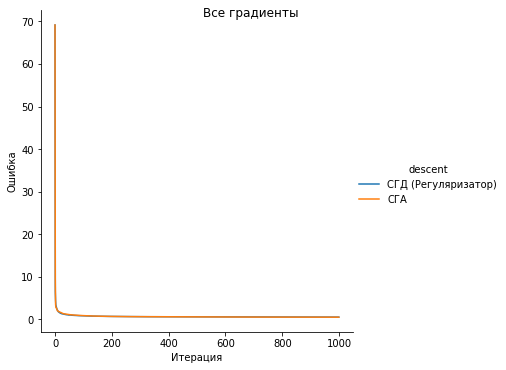

In [85]:
sgd = ['СГА', 'СГД (Регуляризатор)']

gr = sns.relplot(data=df[np.in1d(df['descent'], sgd)], x='iteration', y='loss', hue='descent', kind="line").set_axis_labels("Итерация", "Ошибка")
gr.fig.suptitle("СГД (С регуляризатором и без него)")

Text(0.5, 0.98, 'Спуск с полным градиентом (С регуляризатором и без него)')

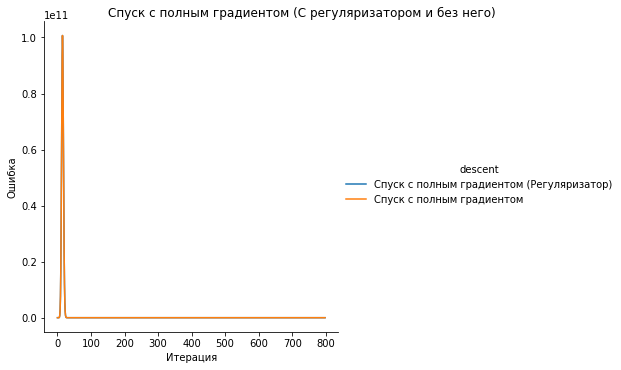

In [87]:
full = ['Спуск с полным градиентом', 'Спуск с полным градиентом (Регуляризатор)']

gr = sns.relplot(data=df[np.in1d(df['descent'], full)], x='iteration', y='loss', hue='descent', kind="line").set_axis_labels("Итерация", "Ошибка")
gr.fig.suptitle("Спуск с полным градиентом (С регуляризатором и без него)")

Text(0.5, 0.98, 'Спуск с полным градиентом (С регуляризатором и без него)')

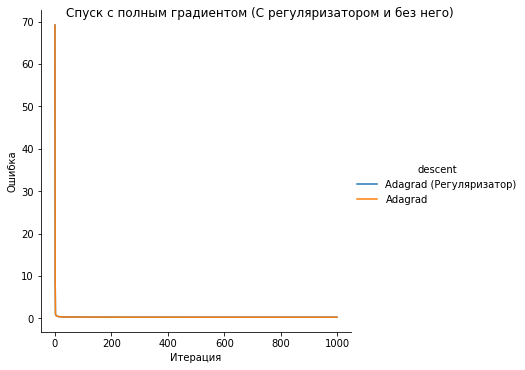

In [88]:
ada = ['Adagrad', 'Adagrad (Регуляризатор)']

gr = sns.relplot(data=df[np.in1d(df['descent'], ada)], x='iteration', y='loss', hue='descent', kind="line").set_axis_labels("Итерация", "Ошибка")
gr.fig.suptitle("Adagrad (С регуляризатором и без него)")

Text(0.5, 0.98, 'Momentum (С регуляризатором и без него)')

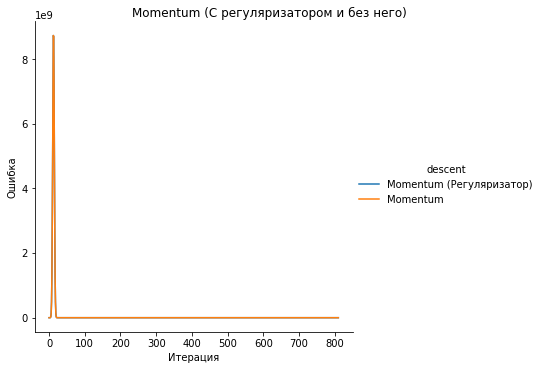

In [89]:
momentum = ['Momentum', 'Momentum (Регуляризатор)']

gr = sns.relplot(data=df[np.in1d(df['descent'], momentum)], x='iteration', y='loss', hue='descent', kind="line").set_axis_labels("Итерация", "Ошибка")
gr.fig.suptitle("Momentum (С регуляризатором и без него)")

**Вывод**: Графики зависимости ошибки от итерации спуска для модификаций с регуляризатором и без него ведут себя одинаково.

## Задание 8. Бонус — Реализация метода SAG (2 балла)

В качестве бонуса вам будет следующее задание - напишите собственную реализацию стохастического градиентного спуска по методу SAG в файле `utils.py`. Подробнее прочитать про SAG можно [здесь](https://arxiv.org/pdf/1309.2388.pdf).

Сравните свою реализацию метода SAG с обычным полным градиентным спуском на наших данных. Проведите сравнение аналогично заданию 5. Что вы можете сказать про сходимость этого метода?

Какие-то наработки есть (файл utils), но дальше них не ушло 
¯\_(ツ)_/¯

In [104]:
# YOUR CODE:
w0 = np.zeros(train_x_processed.shape[1])
descent = StochasticAverageGradient(lambda_ = lambda_, w0 = w0, x_shape=train_x_processed.shape[0])
sag_regression = LinearRegression(descent = descent)
sag_regression.fit(train_x_processed, train_y)

ValueError: operands could not be broadcast together with shapes (456,) (148723,) (456,) 

Вставьте картинку или видео, описывающие ваш опыт выполнения этого задания.

![](https://vkclub.su/_data/stickers/kotovichok/sticker_vk_kotovichok_014.png)

Это я жду, когда модели обучатся. Реально очень долго, k проходов по разным минибатчам ждал целый час :(